In [1]:
from models import KMeans
from models.utils import strategies
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import train_test_split, evaluate, kmeans_elbow
from typing import get_args
import seaborn as sns
from sklearn.cluster import KMeans as KMeans_sklearn

sns.set_theme(style="whitegrid")

# Load data

In [2]:
df = pd.read_csv('../data/processed_dataset1.csv')
df

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,-1.551804,-0.091098,0.521393,-0.066513,0.535760,0.366969,-0.322992,-1.155578,-1.437858,-0.389002,0.066270,-1.616350,0.366969,0.0
1,-0.514221,-0.466324,-1.354331,0.682937,1.459280,1.579355,0.361963,-0.651246,-1.227329,1.281175,-1.424239,0.926065,1.579355,0.0
2,-1.205943,0.250017,1.856369,0.542415,-0.245679,1.747741,0.050446,-0.651246,-1.227329,1.346247,-1.472898,0.926065,1.747741,0.0
3,-1.288950,-0.705105,-0.196789,0.776619,0.251601,1.175226,0.361963,-0.315025,-1.349819,1.259485,-1.485703,0.926065,1.175226,0.0
4,0.274342,0.352352,-0.458715,0.729778,-1.027119,0.905807,2.163555,-1.071523,-1.265607,1.606534,-1.542045,0.926065,0.905807,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1.394931,0.625244,1.053694,2.275519,-0.245679,-1.013802,0.241749,-0.146914,0.238713,-0.562527,0.660424,1.480647,-1.013802,1.0
874,0.191335,0.045348,-0.103848,-1.097006,-0.529839,-1.653672,-1.157460,-0.230970,1.605233,-1.083102,-0.120684,-0.067852,-1.653672,1.0
875,0.357348,0.113571,-1.083956,0.682937,0.535760,-0.340255,-0.011120,0.357418,-0.189999,-0.692671,-0.504836,-0.495024,-0.340255,1.0
876,0.966063,1.682700,-0.906523,-0.441238,0.748880,1.613032,-0.521073,1.702303,0.196607,0.153263,1.228969,0.626303,1.613032,2.0


In [3]:
target_column = 'Fertility'

In [4]:
Y = df[target_column]
X = df.drop(target_column, axis=1)

In [5]:
# for current_type in PlotType:
#     plot(X, plot_type=current_type)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(702, 13) (176, 13) (702,) (176,)


# 1. Kmeans

In [7]:
# kmeans_elbow(X, k_range=range(2, 7), strategy='manhattan')

- we can see that the best number of clusters is 3

In [8]:
kmeans = KMeans(num_clusters=3, max_iter=100)

In [9]:
kmeans.fit(X_train)
kmeans.labels_

array([1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0,
       1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2,
       2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1,
       1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0,
       2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0,

In [10]:
kmeans.predict(X_test)

array([1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2,
       1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2],
      dtype=int64)

C:\Users\chare\anaconda3\envs\data_mining\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


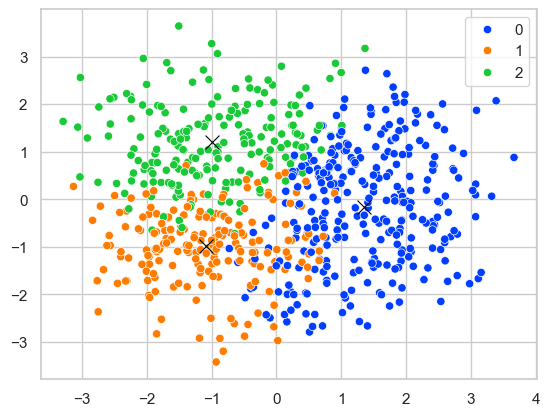

In [11]:
kmeans.plot(X_train)

In [12]:
models = [KMeans(num_clusters=7, max_iter=100) for strategy in strategies]
models

In [13]:
averages = list(get_args(Average))
averages.remove('binary')
averages

['macro', 'micro', 'weighted']

In [14]:
pred = kmeans.predict(X_test)

pred

array([1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2,
       1, 2, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2],
      dtype=int64)

In [40]:
sklearn_kmeans = KMeans_sklearn(n_clusters=3).fit(X_train)

C:\Users\chare\anaconda3\envs\data_mining\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
evaluate(X_train, Y_train, X_test, Y_test, models, get_args(Metric), averages)

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,<models.kmeans.KMeans object at 0x0000017FD425...,0.039773,0.147090,0.134615,0.199278,0.064815,0.039773,0.039773,0.064376,0.061404,0.060952,0.866911,0.872159,0.856414
1,<models.kmeans.KMeans object at 0x0000017FD425...,0.193182,0.365882,0.400000,0.483226,0.181713,0.193182,0.193182,0.220732,0.260536,0.271248,0.845131,0.855114,0.825167
2,<models.kmeans.KMeans object at 0x0000017FD425...,0.210227,0.424894,0.462500,0.534025,0.256944,0.210227,0.210227,0.270001,0.289062,0.291244,0.862225,0.877841,0.830994
3,<models.kmeans.KMeans object at 0x0000017FD425...,0.142045,0.370238,0.320513,0.466071,0.222222,0.142045,0.142045,0.190909,0.196850,0.198760,0.865690,0.849432,0.898206
4,<models.kmeans.KMeans object at 0x0000017FD425...,0.136364,0.319048,0.358209,0.450649,0.096065,0.136364,0.136364,0.147636,0.197531,0.209328,0.865369,0.877841,0.840426
